In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

I have found working with time series interesting and certainly challenging.  When working with time series forecasting it's important to remember that it's the use of a model to predict future values based on previously observed values.  Time series forcasting is used in wide variety of areas rangnign from stock price, weather to retail sales.  This blog will hopefully give you an overview of how create a time series algorithmn to forecast predictions from beginning to end. 
For those of you who have never worked with a time series or have a limited experience you may be wondering what exactly is a timeseries?  The definition of a time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time.  In other words a time series is a sequence of data points recorded at regular time intervals. https://en.wikipedia.org/wiki/Time_series<br>
I will be working with the airline passenger dataset. use the following steps which will enable us to  process and analyze data and make predictions:   
1. Load the data using Pandas
2. Stationarity
3. Fit the Auto_ARIMA Model
4. Make predictions on the test set
5. Calculate the RMSE. 

In [2]:
#parse_dates=True , makes syre pandas undersrand we're dealing with date vlaues otherwise it will treat it as normal string.
"""
Import the Data
I am working with Pandas to get the data.  I changed the name of the column were using to #Passengers from its previous long title.  
The data points have corresponding dates but the dates need to be set as the index since we are using the data set as a time series.  The parameter index_col enables us to do this.  The parse_dates parameter tells Pandas
that we are dealing with date values otherwise it will treat them as regular strings.

"""
df = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)
df.columns=['#Passengers']

df.index = pd.to_datetime(df.index)

#data.index.freq = 'MS' #set index frequency, monthly start

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142 entries, 1949-03-01 to 1960-12-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  142 non-null    int64  
 1   Pass_diff    142 non-null    float64
 2   Pass_log     142 non-null    float64
 3   Pass_sqrt    142 non-null    float64
 4   log_diff     142 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.7 KB


In [3]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
#this saya it's a dataframe
#need time series. Need Time Series object
df.dtypes 

#Passengers    int64
dtype: object

In [5]:
df.shape

(144, 1)

Text(0, 0.5, 'Number of Passengers')

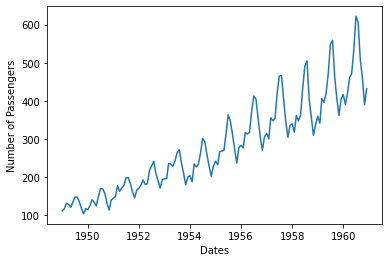

In [6]:
"""
we have a trend so need to check the stationarity
is this data stationary or not

"""
plt.plot(df.index,df['#Passengers'])
plt.xlabel('Dates')
plt.ylabel('Number of Passengers')

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.dtypes

#Passengers    int64
dtype: object

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

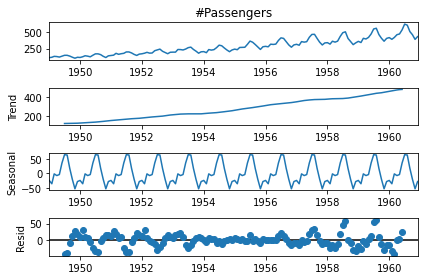

In [10]:
#Run an ETS Decomposition
#usnig an additive model for it
#seaonality of values
#resudiual is what is not explained by trend and seasonality
"""
there is seasonality associated w/data. every year there is a spike in passengers.
"""
result = seasonal_decompose(df['#Passengers'], model='add')
result.plot();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb101f4e80>]],
      dtype=object)

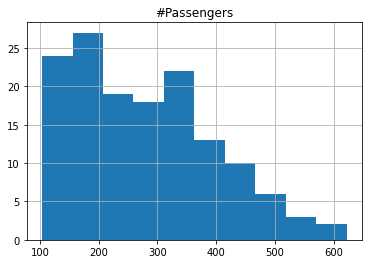

In [11]:
"""
the data isn't normally distributed
"""
df.hist()

In [12]:
#test for stationarity
from statsmodels.tsa.stattools import adfuller

In [13]:
def adf_test(data):    
    X = data.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [14]:
adf_test(df)

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [15]:
#data['Passenger_log'] = np.log(data['Thousands of Passengers'])

In [16]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
#adf_test(data['Passenger_log'])

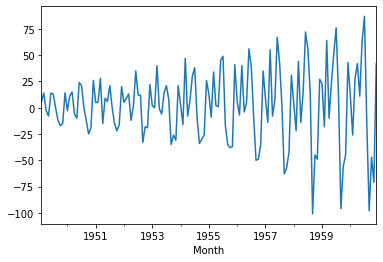

In [18]:
df['Pass_diff'] = df['#Passengers'] - df['#Passengers'].shift(1)
df.dropna(inplace=True)
df['Pass_diff'].dropna().plot()

In [19]:
#data['Passenger_rolling'] = data['Thousands of Passengers'].rolling(window=5).mean()
#data.dropna(inplace=True)
#data.dropna(inplace=True)

In [20]:
adf_test(df['Pass_diff'])

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [21]:
df['Pass_log'] = np.log(df['#Passengers']) 
df['Pass_sqrt'] = np.sqrt(df['#Passengers']) 
df.dropna(inplace=True)

In [22]:
adf_test(df['Pass_log'])

ADF Statistic: -1.728815
p-value: 0.416331
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [23]:
adf_test(df['Pass_sqrt'])

ADF Statistic: -0.375660
p-value: 0.914084
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [24]:
df['log_diff'] = df['Pass_log'] - df['Pass_log'].shift(1)
df.dropna(inplace=True)

In [25]:
adf_test(df['log_diff'])

ADF Statistic: -2.877449
p-value: 0.048034
Critical Values:
	1%: -3.483
	5%: -2.885
	10%: -2.579


In [26]:
#run auto_arima to obtain recommended orders
#from pmdarima import auto_arima

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
import pmdarima as pm
from pmdarima import auto_arima

import statsmodels.api as sm

from pmdarima import auto_arima

In [27]:
df.isna().sum()

#Passengers    0
Pass_diff      0
Pass_log       0
Pass_sqrt      0
log_diff       0
dtype: int64

In [28]:
len(df)

142

In [29]:
log_dif = df['log_diff']
len(log_dif)

142

In [30]:
train = log_dif[:int(0.8*(len(log_dif)))]
test = log_dif[int(0.8*(len(log_dif))):]

In [31]:
len(train), len(test)

(113, 29)

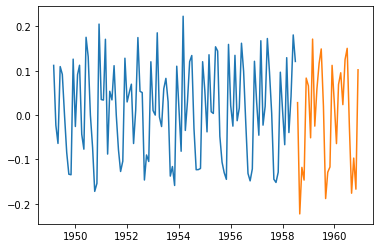

In [32]:
plt.plot(train)
plt.plot(test)

In [33]:
"""
In the ARIMA model, the tuning processes such as determining the p,d,q values are very time consuming.

"""

print('notes')

notes


In [34]:
#get aummary of results
autoarima_model = auto_arima(train, start_p = 0, d = 1,start_q = 0, #start_q = 0
                                         # use adftest to find optimal 'd'
                              max_p = 5, max_d = 5, max_q = 5,   # maximum p and q
                              m = 12,                  #frequency of series 
                                          # let model determine 'd', was 1
                              start_P = 0, D=1, start_Q = 0,
                              max_P = 5,max_D = 5,max_Q = 5, 
                              seasonal = True, 
                              #start_P=0, D=1, 
                              trace = True, #start  #trace= True
                              error_action ='ignore',   # we don't want to know if an order does not work 
                              suppress_warnings = True,  # we don't want convergence warnings 
                              stepwise = True)           # set to stepwise  


Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-228.650, BIC=-223.440, Fit time=0.071 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-301.288, BIC=-290.868, Fit time=0.326 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-345.544, BIC=-335.123, Fit time=1.052 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-343.528, BIC=-330.502, Fit time=1.013 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-315.126, BIC=-307.310, Fit time=0.110 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-343.506, BIC=-330.480, Fit time=1.995 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-341.585, BIC=-325.953, Fit time=3.530 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-343.022, BIC=-329.996, Fit time=1.961 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=-259.528, BIC=-251.712, Fit time=0.452 seconds
Fit ARIMA: order=(0, 1, 2) s

In [35]:
autoarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  113
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 180.325
Date:                              Mon, 12 Apr 2021   AIC                           -348.651
Time:                                      11:10:37   BIC                           -333.020
Sample:                                           0   HQIC                          -342.325
                                              - 113                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.000     -0.405      0.686      -0.001       0.000
ar.L1         -0.6825      0.233     -2.931      0.003      -1.139      -0.226
ma.L1         -0.5377      0.284     -1.895      0.058      -1.094       0.018
ma.L2         -0.4088      0.292     -1.398      0.162      -0.982       0.164
ma.S.L12      -0.5559      0.115     -4.839      0.000      -0.781      -0.331
sigma2         0.0015      0.000      6.457      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                       33.54   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.75   Prob(JB):                         0.88
Heteroskedasticity (H):               0.22   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
autoarima_model.fit(train)

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [37]:
prediction = pd.DataFrame(autoarima_model.predict(n_periods=len(test)), index=test.index)
prediction.columns= ['Predicted_Passengers']
prediction

,Predicted_Passengers
Month,
1958-08-01,-0.018041
1958-09-01,-0.135099
1958-10-01,-0.149634
1958-11-01,-0.133502
1958-12-01,0.109694
1959-01-01,0.015870
1959-02-01,-0.055301
1959-03-01,0.139297
1959-04-01,-0.033909


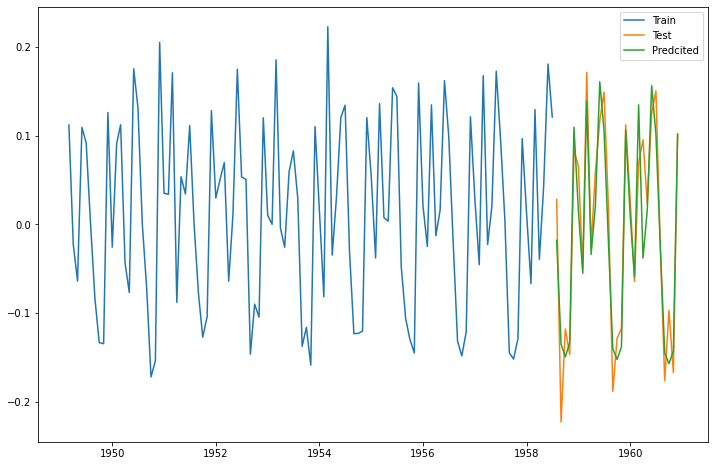

In [38]:
plt.figure(figsize=(12,8))
plt.plot(train, label='Train')
plt.plot(test,label='Test')
plt.plot(prediction, label='Predcited')
plt.legend()

In [39]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = np.sqrt(mean_squared_error(test,prediction))
print('The Root Mean Squared Error of Predictions is {}'.format(round(rms, 4)))

The Root Mean Squared Error of Predictions is 0.0442
